# Data Analyst Professional Practical Exam Submission

# Table of Contents

- [Data Analyst Professional Practical Exam Submission](#data-analyst-professional-practical-exam-submission)
- [1. Introduction](#1-introduction)
- [2. Data Validation and Cleaning](#2-data-validation-and-cleaning)
  - [2.1. raw dataset](#21-raw-dataset)
  - [2.2. Validation and cleaning steps](#22-validation-and-cleaning-steps)
  - [2.3. Cleaned dataset](#23-cleaned-dataset)
- [3. Exploratory Analysis](#3-exploratory-analysis)
  - [3.1. Number of Customers for Each Sales Method](#31-number-of-customers-for-each-sales-method)
  - [3.2. What does the spread of revenue look like overall? and for each method?](#32-what-does-the-spread-of-revenue-look-like-overall-and-for-each-method)
  - [3.3. Was there any difference in revenue over time for each of the methods?](#33-was-there-any-difference-in-revenue-over-time-for-each-of-the-methods)
  - [3.4. Investigation of any differences between the customers in each sales method group](#34-investigation-of-any-differences-between-the-customers-in-each-sales-method-group)
    - [3.4.1. 'Email + Call' encouraged the most item sales](#341-email--call-encouraged-the-most-item-sales)
    - [3.4.2. States are similarly distributed between sales methods.](#342-states-are-similarly-distributed-between-sales-methods)
    - [3.4.3. Customer years are similarly distributed between sales methods.](#343-customer-years-are-similarly-distributed-between-sales-methods)
    - [3.4.4. Number of site visits slightly higher for 'Email + Call' Sales strategy](#344-number-of-site-visits-slightly-higher-for-email--call-sales-strategy)
- [4. A new metric for monitoring sale method efficacy.](#4-a-new-metric-for-monitoring-sale-method-efficacy)
  - [4.1 Modeling Effective Revenue Per Contact minute (ERCM)](#41-modeling-effective-revenue-per-contact-minute-ercm-)
    - [4.1.1 Conversion Rate](#411-conversion-rate)
    - [4.1.2 Contact Minutes](#412-contact-minutes)
    - [4.1.3 ERCM Estimation during the first 6 weeks post launch](#413-ercm-estimation-during-the-first-6-weeks-post-launch)
- [5 Summary](#5-summary)
  - [5.1 Main Findings](#51-main-findings)
  - [5.2 Recommendations](#52-recommendations)


# 1. Introduction
Six weeks ago, Pens and Printers launched a new line of office stationary. At launch, three distinct sales methods were tested:

1. 'Email': Customers received **one email** at product launch and **another email** three weeks later. 
2. 'Call': Customers received **one phone call** from the sales team.
3. 'Email + Call': Cumstomers received **one email** at product launch and **one phone call** from the sales team one week later. 

Because some methods are more time consuming than others, this report aims to answer the question of **which sales strategy is most effective?** 

# 2. Data Validation and Cleaning
## 2.1. raw dataset
The dataset has 15000 rows and 8 columns containing integer, character and numerical variables, as seen below: 

In [3]:
# import data
suppressPackageStartupMessages(library(dplyr))
df <- read.csv("product_sales.csv")  
str(df)

'data.frame':	15000 obs. of  8 variables:
 $ week             : int  2 6 5 4 3 6 4 1 5 5 ...
 $ sales_method     : chr  "Email" "Email + Call" "Call" "Email" ...
 $ customer_id      : chr  "2e72d641-95ac-497b-bbf8-4861764a7097" "3998a98d-70f5-44f7-942e-789bb8ad2fe7" "d1de9884-8059-4065-b10f-86eef57e4a44" "78aa75a4-ffeb-4817-b1d0-2f030783c5d7" ...
 $ nb_sold          : int  10 15 11 11 9 13 11 10 11 11 ...
 $ revenue          : num  NA 225.5 52.5 NA 90.5 ...
 $ years_as_customer: int  0 1 6 3 0 10 9 1 10 7 ...
 $ nb_site_visits   : int  24 28 26 25 28 24 28 22 31 23 ...
 $ state            : chr  "Arizona" "Kansas" "Wisconsin" "Indiana" ...


## 2.2. Validation and cleaning steps
Data was validated and cleaned according to the steps outlined in Table 1

**Table 1**. Validation and Cleaning of data 
| Column | Validation steps| cleaning steps |
|---|---|---|
| week | Column only contains values between 1-6 to represent the first six sale weeks since product launch. No missing values. | No cleaning required |
| sales_method | Distribution across different sales methods was checked using table(). No missing values. | **Made** **nomenclature consistent** by 1) replacing 'em + call' with 'Email + Call', and 2) ensuring each sales_method is capitalized. |
| customer_id | Proportion of (unique values)/(number of rows) was calculated: Column contained 100% unique values and no missing values.  | No cleaning required |
| nb_sold | Density plot is right-skewed. No missing values.  | No cleaning required |
| revenue* | Density plot is right-skewed. 0.5% of observations have NA for revenue. 100% of those 'NA revenue' observations have >0 nb_sold.  | Observations **where revenue == NA were removed**. All values were **rounded to 2 d.p.** |
| years_as_customer | Density plot is very right-skewed. Two rows contain entries where years as customer exceeds the company's age. No missing values. | Two rows where years_as_customer **exceeds the company's age were removed** |
| nb_site_visits | Density plot is normally distributed. No missing values. | No cleaning required |
| state | Distribution across different states was checked using table(). No spelling errors or accidental state duplicates. No missing values | No cleaning required |


\*Revenue cleaning justification:

**Issue**: Rows with missing revenue (NA) do not correspond to zero sales; all such rows have >0 product sales, so replacing NAs with zero would be incorrect. **Should NAs be replaced with the median, or be removed from the dataset?**

**Analysis**: I compared the distribution of values between the rows with missing revenue and the full dataset. Most columns were similarly distributed, but the **sales method** distribution differed significantly (figure 1). This suggests the missing revenue is **not random**, as certain sales methods appear misrepresented. 

**Conclusion**: Since replacing NA values with the median could introduce bias, I decided to **remove the rows with missing revenue**. As only 0.5% of rows are affected, this removal will not significantly impact the datset.

![Figure 1](https://raw.githubusercontent.com/JulianKempenaers/Data-Driven-Sales-Recommendations/main/Figures/NArev_sales_method.png)


**Figure 1. Comparison of Sales Method Distribution by Revenue Status.** This figure compares the distribution of sales methods between the full dataset and the subset of rows with missing revenue. The bars show the proportion of each sales method within the two groups: "Full Dataset" and "NA revenue". A Chi-Squared test was performed to compare the distribution of sales methods between the full dataset and the group with missing revenue. The results showed a statistically significant difference (X² = 251.2, df = 2, p-value < 2.2e-16), suggesting that the two groups have different sales method distributions. This indicates that the missing revenue data is not missing at random.

## 2.3. Cleaned dataset
The cleaned dataset has 13924 rows and 8 columns containing integer, character , Factor and numerical variables, as seen below: 

In [4]:
suppressPackageStartupMessages({
  library(dplyr)
  library(readr)
})
cleaned_df <- df %>%
	filter(
		!is.na(revenue),
		years_as_customer<=(2025-1984)
	) %>%
	mutate(
		sales_method = gsub("em \\+ call", "Email + Call", sales_method),
		sales_method = tools::toTitleCase(sales_method),  # Capitalize
		sales_method = factor(sales_method, levels = c("Call", "Email", "Email + Call")),
		revenue = round(revenue, 2)
	)
str(cleaned_df)

'data.frame':	13924 obs. of  8 variables:
 $ week             : int  6 5 3 6 4 1 5 5 3 2 ...
 $ sales_method     : Factor w/ 3 levels "Call","Email",..: 3 1 2 1 2 2 2 1 2 1 ...
 $ customer_id      : chr  "3998a98d-70f5-44f7-942e-789bb8ad2fe7" "d1de9884-8059-4065-b10f-86eef57e4a44" "10e6d446-10a5-42e5-8210-1b5438f70922" "6489e678-40f2-4fed-a48e-d0dff9c09205" ...
 $ nb_sold          : int  15 11 9 13 11 10 11 11 9 9 ...
 $ revenue          : num  225.5 52.5 90.5 65 113.4 ...
 $ years_as_customer: int  1 6 0 10 9 1 10 7 4 2 ...
 $ nb_site_visits   : int  28 26 28 24 28 22 31 23 28 23 ...
 $ state            : chr  "Kansas" "Wisconsin" "Illinois" "Mississippi" ...


# 3. Exploratory Analysis
Exploratory analysis was carried out to address questions from the head of sales:
1. How many customers were there for each approach?
2. What does the spread of revenue look like overall? And for each method?
3. Was there any difference in revenue over time for each of the methods?
4. Are there other differences between the customers in each group?
5. Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team so they may not be the best for us to use if the results are similar. 


## 3.1. Number of Customers for Each Sales Method
The sales method **'Email' attracted the most customers.**  If each method was tried on an equal number of customers ** , these results suggest that Email is the most effective approach to attract a large number of customers. 

<img src="Figures/customers_per_method.png" style="width:400px;"/>


**Figure 2**

** Information on how many times each method was used is missing. For the purposes of this report, it will be assumed that each method was used on an equal number of customers.


The below graph details how the number of customers in each sales method fluctuated per week. 

- During the **first three weeks** following product launch, **'Email' attracted the most customers**. However, 'Email' Custmomer numbers **declined throughout** the weeks. 
- The 'Email' sales method was overtaken by 'Call' at the end of week 4. By the end of week 5, the sales method 'Email + Call' also overtook 'Email'. 

This suggests that while **'Email' Initially attracts the most customers**, it is likely **not suitable for maintaining sufficient numbers long-term**. 

<img src="Figures/customers_per_method_per_week.png" style="width:400px;"/>

**Figure 3.**

## 3.2. What does the spread of revenue look like overall? and for each method?
The histogram (Figure 4) shows the spread of revenue overall. The distribution shows three distinct peaks, which correspond with the three sales methods. Medians, interquartile ranges and outliers are plotted in the boxplot below (Figure 5). 
Results: 
- 'Email + call' generated the most revenue per customer, with a median of \$185 (s.d. 29). It does have the widest revenue range, indicating less stability in revenue. 
- 'Email' generated the middle peak, with a median of \$96 (s.d. 11)
- 'Call' generated the least revenue per customer, with a median of \$49 (s.d. 9).
- 
<div style="display:flex; gap:10px;">
  <img src="Figures/revenue_.png" style="width:400px;"/>
  <img src="Figures/Revenue%20Distribution.png" style="width:400px;"/>
</div>

**Figure 4.**


<img src="Figures/revenue%20spread.png" style="width:400px;"/>


**Figure 5.**

## 3.3. Was there any difference in revenue over time for each of the methods?
Assuming that each method was applied to an equal number of customers, total revenue per method per week was plotted instead of mean revenue per customer per method. 

Results:
- 'Email' revenue throughout the weeks (figure 6) closely followed 'Email' Customer numbers throughout the weeks (Figure 3). During the **first four weeks** following product launch, **'Email' held  the highest total revenue per week**. Generally, 'Email' revenue **declined throughout** the weeks, except for a small increase in revenue at week 4, likely caused by the second wave of emails sent out in week three. The second wave of emails was not as effective as the first, since total revenue ultimately **dropped below both other sales methods** by week 6. 
- Total revenue from customers recruited via the 'Call' method (Figure 6) also closely followed the 'Call' customer numbers throughout the weeks (Figure 3). **The 'Call' method revenue was relatively low and constant** throughout the weeks. 
- Total revenue from the **'Email + Call' method was lowest in week one, but steadily increased until week 5** where it outperformed the 'Email' method's revenue. 

This suggests that the **'Email + Call' method may be best for maintaining high revenue long-term**

<img src="Figures/total%20revenue%20per%20week.png" style="width:400px;"/>

**Figure 6.**

## 3.4. Investigation of any differences between the customers in each sales method group

To investigate whether there are any differences between the customers in each sales method group, I used a randomForest algorithm. The feature importance values from this model (Figure 7) provide insight into which variables contribute the most to the predicition of sales method. This helps identify potential confounding variables.

The importance of these factors on the sales method were:
1. **Items sold**: This is the most important feature (Importance = 2198). 
2. **State**: The second most important feature (Importance = 1441). 
3. **Years as customer**: The third most important feature (Importance = 1084)
4. **Number of Site visits** The fourth/least important feature (Importance = 912)

These features are worth exploring further, particularly as they may be contributing to variations in the dependent variables (revenue and number of customers). 

<img src="Figures/feature_importance.png" style="width:400px;"/>

**Figure 7.**

### 3.4.1. 'Email + Call' encouraged the most item sales
'Email + Call' had the highest item sales range (Figure8). On average, customers from this category purchased 12 items (median), which is slightly higher than a median of 10 items for customers from both the 'Email' and 'Call' sales methods.  This suggests that'**Email + Call' may encourage customers to purchase more products**. This aligns with the previous finding that this sales strategy generated the highest revenue per customer. 

<img src="Figures/Items%20sold%20per%20sales%20method.png" style="width:400px;"/>


**Figure 8.**



### 3.4.2. States are similarly distributed between sales methods.
For each method, the highest proportion of customers were from California, Texas, New York and Florida (Figure 9). The distribution of state proportions between the three sales methods is very similar.

<img src="Figures/states_per_method.png" style="width:400px;"/>

**Figure 9.**



### 3.4.3. Customer years are similarly distributed between sales methods.
The IQRs for all sales methods are relatively narrow, with 75% having been a customer for less than 7 years (Figure 10). This suggests that **regardless of the sales method, most purchases were made by relatively new customers.**

<img src="Figures/Years_as_customer.png" style="width:400px;"/>

**Figure 10.**

### 3.4.4. Number of site visits slightly higher for 'Email + Call' Sales strategy

Customers in 'Email + Call' made slightly more site visits (median 27), which is slightly higher than a median of 25 and 24 site visits for customers from the 'Email' and 'Call' sales methods respectively (Figure 11).  This suggests that'**Email + Call' may encourage customers to visit the website more often, ultimately encouraging more purchases.**. 

<img src="Figures/site%20visits.png" style="width:400px;"/>

**Figure 11.**

# 5. A new metric for monitoring sale method efficacy.
The most important dependent variable for measuring benefit to the company is **revenue**. To achieve high revenue, a sales method must excel at the following:
1. Encourage customers to **visit the website** and **place a purchase** consisting of **many and expensive products**. 
2. Be **time efficient**, so that as many customers as possible can be contacted. 

The best sales method would be the one that maintains a high revenue, while taking into account how long it takes to carry out each sales method. I propose a new metric to monitor this: **Effective Revenue per Contact Minute** (ERCM). 
 ERCM can be calculated for each customer's purchase:

$$
ERCM = \frac{\text{Revenue} \times \text{Conversion Rate}}{\text{Contact Minutes}}
$$

## 4.1 Modeling Effective Revenue Per Contact minute (ERCM)
### 4.1.1 Conversion Rate
The Conversion rate is the percentage of contacted customers that place a purchase. This information is can not be calculated from the currently available dataset. Throughout the report, it has been assumed that all sales methods had been used on an equal number of customers, which would make 'customers per sales method' a possible equivalent for the sake of this estimation. However, it is more reliable to use average market values to estimate initial values of ERCM.
| Sales Method | Average Conversion Rate | Source |
|---|---|---|
| Email | 2.14% | https://www.bloomreach.com/en/blog/email-conversion-rate?utm_source=chatgpt.com#:~:text=B2B%20distributors,2.14%25. |
| Call | 2.30% | https://www.cognism.com/blog/cold-calling-success-rates#:~:text=success%20rate%20is-,2.3%25,-(based%20on%20an |
| Call + Email | 40% | https://fullenrich.com/blog/cold-calling-vs-warm-calling#:~:text=warm%20calls%20is-,30%25%20to%2050%25,-%2C%20compared%20to%201 |

### 4.1.2 Contact Minutes
Different sales methods have different Contact minutes.
Average call times were reported by the sales team. It was assumed that it takes 1 minute to copy the email template and send it to the customer.   

| Sales Method | Description of time spent contacting customers | Contact Minutes |
|---|---|---|
| Call | one ~30min phone call from the sales team. | 30 |
| Email | one email at product launch and another email three weeks later.  | 2 |
| Call + Email | one email at product launch and one ~10min phone call from the sales team one week later.   | 11 |

### 4.1.3 ERCM Estimation during the first 6 weeks post launch
There is a statistically significant difference in the ERCM across the three sales methods (Kruscal-Wallis test: X-squared = 11592, df=2, p<2.2e-16). Specicially, the 'Email + Call' method exhibited by far the highest ERCM, outperforming both 'Call' and 'Email' methods (figure 12). This suggests that the combined approac of email and follow-up call is the most efficient at generating revenue relative to time spent contacting customers. Therefore, **'Email + Call' yields the highest return on time investment. **

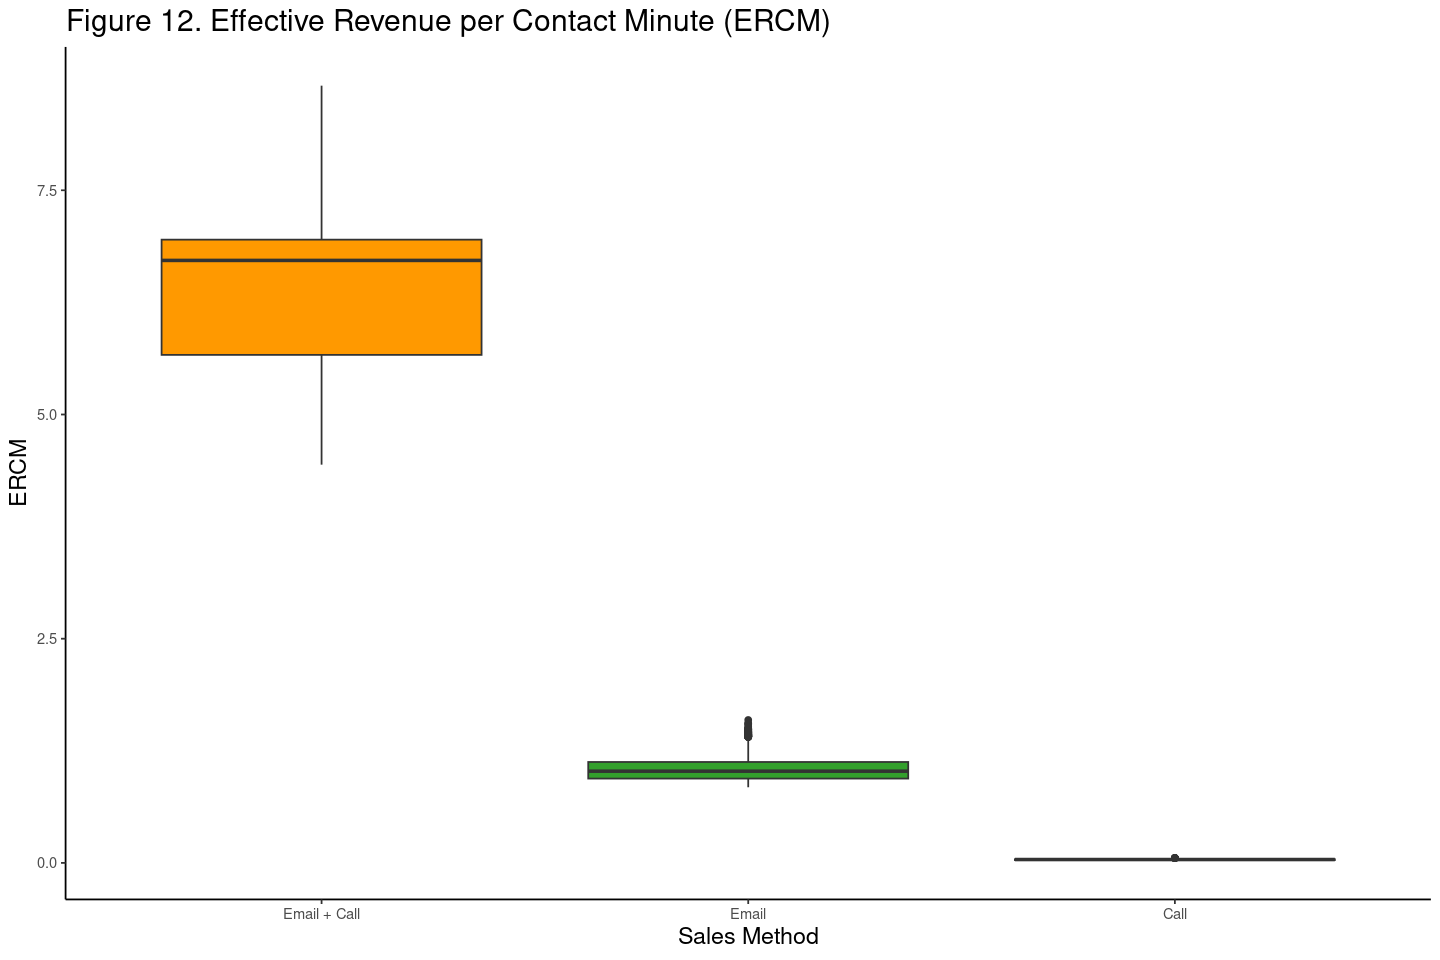

In [5]:
suppressPackageStartupMessages({
  	library(dplyr)
  	library(readr)
	library(forcats)  
	library(scales) 
	library(ggplot2)
})
 custom_theme <- ggplot2::theme_classic() +
  theme(
    plot.title = element_text(size = 18),        # Title text size
    axis.title.x = element_text(size = 14),      # X-axis title text size
    axis.title.y = element_text(size = 14),      # Y-axis title text size
    legend.title = element_text(size = 12),      # Legend title text size
    legend.text = element_text(size = 10)        # Legend labels text size
  )

options(repr.plot.width = 12, repr.plot.height = 8)  
conversion_adjusted <- cleaned_df %>%
  mutate(avg_time = case_when(
    sales_method == "Email" ~ 2,
    sales_method == "Call" ~ 30,
    sales_method == "Email + Call" ~ 11,
  )) %>%
	mutate(conversion_rate = case_when(
	sales_method == "Email" ~ 0.0214,
    sales_method == "Call" ~ 0.023,
    sales_method == "Email + Call" ~ 0.4,
	)) %>%
	mutate(RPCM = revenue/avg_time, #revenue per contact minute
		  ERCM = conversion_rate*RPCM) #effective revenue per contact minute

	
ggplot(conversion_adjusted, aes(x=fct_reorder(sales_method, ERCM, .fun=median, .desc=TRUE), y=ERCM, fill=sales_method)) +
geom_boxplot(position='dodge') +
  labs(title="Figure 12. Effective Revenue per Contact Minute (ERCM)", x="Sales Method", y="ERCM", fill="Sales Method") +
theme_set(custom_theme) +
theme_set(custom_theme) +
scale_fill_manual(values = c("Call" = "#1F78B4", "Email" = "#33A02C", "Email + Call" = "#FF9900"))+
theme(legend.position = "none")

# 5 Summary
## 5.1 Main Findings
This report aimed to answer the question of **which sales strategy is most effective?** Analysis was carried out on sales data across 6 weeks post new product launch. 
The main findings are:
1. Cold calls take a long time and have the lowest return on investment. 
2. 'Email' without a followup call saw an initial spike in total revenue, which rapidly decreased across the 6 weeks.
3. Combined 'Email + Call' generated higher revenue per customer and larger quantities of item sales per purchase. 
4. Modeling the Effective Revenue per Contact Minutes (ERCM) revealed that 'Email + Call' is likely to have the highest return on investment.***

*** Note: The model is based on estimated values of: Conversion rate, and Contact Minutes.  


## 5.2 Recommendations
1. Focus sales efforts on 'Email' and 'Email + Call' strategies, and abandon the 'Call' strategy for the next six weeks.
2. **all Contact Minutes per customer** should be documented and added to the database from now on.
3. Contact minutes should be logged at time of contact, **regardless of whether a purchase was made or not**. 'number of items sold' shall be set to 0 and shall be updated if the customer does place an order. 
4. Analyse real ERCM values within the next 6 weeks to conclude which sales strategy is most effective. 

This will enable an accurate calculation of (conversion rate)/(contact minutes), and therefore an accurate calculation of ERCM. 


